# DATA STORY-TELLING WITH AWS QUICKSIGHT

# US E-COMMERCE DATASET
## DevAx Online Workshop Oct 2021- AWS Vietnam 

**CONTENTS**

- [Exploratory Data Analysis](#eda)
- [Clean Up Data](#cleanup)
- [Miscellaneous Analysis](#miscellaneous)


<a id='eda'></a>

## 1. EXPLORATORY DATA ANALYSIS

- Problem when loading the data into QuickSight:
"12367 rows where Date field date values were not in a supported date format.
16 rows where Individual_Price_US$ field numeric values could not be interpreted"
- The problem is the Date is in the format of DD/MM/YYYY, while the default in QuickSight is MM/DD/YY => data is not valid => Should change the QuickSight format to DD/MM/YYYY before change the Field Type
=> Clean in pandas: Note that 14/11/2013 will be switched to Nov 11, while 05/11/2013 is converted to May 11
=> Need to use **pd.to_datetime(us_clean_df['Date'], dayfirst = True)** to get the right format


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Load the data
us_df = pd.read_csv('Us-Ecommerce Dataset.csv')
print(us_df.shape)
us_df.head(3)

(65535, 19)


,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Transaction Start,Transaction_Result,Amount US$,Individual_Price_US$,Year_Month,Time
0,40170,1348959766,14/11/2013,Hair Band,Female,Web,United States,New York,New York City,Accessories,Member,one-day deliver,12,1,0,"6,910",576,13-Nov,22:35:51
1,33374,2213674919,05/11/2013,Hair Band,Female,Web,United States,California,Los Angles,Accessories,Member,one-day deliver,17,1,1,"1,699",100,13-Nov,06:44:41
2,14407,1809450308,01/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,0,"4,998",217,13-Oct,00:41:24


In [24]:
### Rename columns for easy manipulation
us_df.rename(columns = {'Individual_Price_US$':'Individual_Price_US', 'Amount US$':'Amount_US',
                       'customer_id': 'Customer_id', ' Quantity ': 'Quantity', 
                        'Transaction Start':'Transaction_Start'}, inplace = True)
us_df.head(3)

,Transaction_id,Customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Transaction_Start,Transaction_Result,Amount_US,Individual_Price_US,Year_Month,Time
0,40170,1348959766,14/11/2013,Hair Band,Female,Web,United States,New York,New York City,Accessories,Member,one-day deliver,12,1,0,"6,910",576,13-Nov,22:35:51
1,33374,2213674919,05/11/2013,Hair Band,Female,Web,United States,California,Los Angles,Accessories,Member,one-day deliver,17,1,1,"1,699",100,13-Nov,06:44:41
2,14407,1809450308,01/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,0,"4,998",217,13-Oct,00:41:24


In [25]:
for item in us_df.columns:
    print(item, us_df[item].nunique())

Transaction_id 65535
Customer_id 64999
Date 115
Product 12
Gender 2
Device_Type 2
Country 1
State 3
City 3
Category 8
Customer_Login_type 4
Delivery_Type 2
Quantity 12
Transaction_Start 1
Transaction_Result 2
Amount_US 11310
Individual_Price_US 2387
Year_Month 5
Time 45798


In [26]:
us_df.columns

Index(['Transaction_id', 'Customer_id', 'Date', 'Product', 'Gender',
       'Device_Type', 'Country', 'State', 'City', 'Category',
       'Customer_Login_type', 'Delivery_Type', 'Quantity', 'Transaction_Start',
       'Transaction_Result', 'Amount_US', 'Individual_Price_US', 'Year_Month',
       'Time'],
      dtype='object')

In [48]:
checklist = ['Product', 'Gender',
       'Device_Type', 'City', 'Category',
       'Customer_Login_type', 'Delivery_Type', 'Quantity',
       'Transaction_Start', 'Transaction_Result', 'Year_Month']
for x in checklist:
    print("-----{}-----".format(x))
    print(us_df[x].unique())

-----Product-----
['Hair Band' 'Jean' 'Shirt' 'watNew York Citys' 'Pen Drive' 'spectacles'
 'Fairness Cream' 'Bag' 'vessels' 'Books' 'Cycle' 'Shoes']
-----Gender-----
['Female' 'Male']
-----Device_Type-----
['Web' 'Mobile']
-----City-----
['New York City' 'Los Angles' 'Seattle']
-----Category-----
['Accessories' 'Clothing' 'Electronics' 'Fashion' 'House hold'
 'stationaries' 'Vehicle' 'wearables']
-----Customer_Login_type-----
['Member' 'Guest' 'New ' 'First SignUp']
-----Delivery_Type-----
['one-day deliver' 'Normal Delivery']
-----Quantity-----
[12 17 23 19 20 14 15 22 18 21 13 16]
-----Transaction_Start-----
[1]
-----Transaction_Result-----
[0 1]
-----Year_Month-----
['13-Nov' '13-Oct' '13-Dec' '14-Jan' '13-Sep']


#### Explore the invalid row in Individual_Price_US
- As analysis below, the Individual_Price_US is #VALUE! for 159 rows.
=> Reason could be: The typo error when inputing the 2 adjacent columns Amount_US and Individual_Price_US
=> Wrong data is 0.24 % of the whole dataset => Could remove it.

Does it affect alot?

In [17]:
us_df.query('Transaction_id == 88274')

,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Transaction Start,Transaction_Result,Amount US$,Individual_Price_US$,Year_Month,Time
35559,88274,2020695631,06/01/2014,Bag,Female,Mobile,United States,California,Los Angles,Fashion,Member,one-day deliver,20,1,1,"1,67,500",#VALUE!,14-Jan,14:56:33


In [36]:
wrong_data_df = us_df.query('Individual_Price_US == "#VALUE!"')
wrong_data_df

,Transaction_id,Customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Transaction_Start,Transaction_Result,Amount_US,Individual_Price_US,Year_Month,Time
192,30382,1550737263,31/10/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,17,1,1,"1,61,850",#VALUE!,13-Oct,16:05:37
298,35816,1225531606,09/11/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,13,1,0,"1,26,834",#VALUE!,13-Nov,12:47:28
508,45944,2236204604,22/11/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,20,1,1,"1,33,934",#VALUE!,13-Nov,20:28:15
946,68232,1608443721,14/12/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,20,1,1,"1,60,000",#VALUE!,13-Dec,09:07:10
1148,79559,1902455585,26/12/2013,Shirt,Male,Web,United States,New York,New York City,Clothing,Member,one-day deliver,21,1,1,"1,22,900",#VALUE!,13-Dec,18:16:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64264,39380,1216069884,13/11/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,19,1,1,"1,17,775",#VALUE!,13-Nov,11:06:13
64456,43484,1800956770,19/11/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,12,1,1,"3,58,500",#VALUE!,13-Nov,14:56:39
64828,50814,1543861731,29/11/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,Normal Delivery,18,1,0,"3,46,471",#VALUE!,13-Nov,14:11:49
65078,55380,1707492787,02/12/2013,Shoes,Female,Mobile,United States,Washington,Seattle,wearables,Member,one-day deliver,13,1,1,"2,06,439",#VALUE!,13-Dec,18:21:32


In [37]:
### Wrong data percentage
(wrong_data_df.shape[0]/us_df.shape[0]) * 100

0.2426184481574731

In [40]:
for item in checklist:
    print(item, wrong_data_df[item].value_counts())

Product Fairness Cream       52
Shirt                33
Jean                 22
Shoes                16
spectacles           14
Books                10
Bag                   9
watNew York Citys     3
Name: Product, dtype: int64
Gender Female    81
Male      78
Name: Gender, dtype: int64
Device_Type Web       121
Mobile     38
Name: Device_Type, dtype: int64
Country United States    159
Name: Country, dtype: int64
State Washington    95
California    53
New York      11
Name: State, dtype: int64
City Seattle          95
Los Angles       53
New York City    11
Name: City, dtype: int64
Category Fashion         75
Clothing        55
wearables       16
stationaries    10
Electronics      3
Name: Category, dtype: int64
Customer_Login_type Member    157
Guest       2
Name: Customer_Login_type, dtype: int64
Delivery_Type one-day deliver    82
Normal Delivery    77
Name: Delivery_Type, dtype: int64
Quantity 22    19
19    17
13    16
17    15
15    14
16    14
18    14
20    13
21    12
23    1

In [70]:
checklist = ['Product', 'Gender',
       'Device_Type', 'City', 'Category',
       'Customer_Login_type', 'Delivery_Type', 'Quantity', 'Transaction_Result', 'Year_Month']

def visualize_data(df, checklist, color):
    """Show the variable distribution
    Input: dataframe and list of feature that need to check"""
    ## Setting up for plot
    plt.figure(figsize = (18, 15))
    sns.set(style='whitegrid', rc = {"grid.linewidth": 0.1})
    sns.set_style({"ytick.left":False},)
    
    for i in range(len(checklist)):
        plt.subplot(4, 3, i+1)
        cat_order = df[checklist[i]].value_counts().index
        sns.countplot(data = df, x = checklist[i], color = color, order = cat_order)
        if checklist[i] in ['Product', 'Category']:
            plt.xticks(rotation = 45)
        plt.title("Distribution of {}".format(checklist[i]), fontweight="bold")
        plt.tight_layout()
        plt.xlabel('')
    
    plt.show()

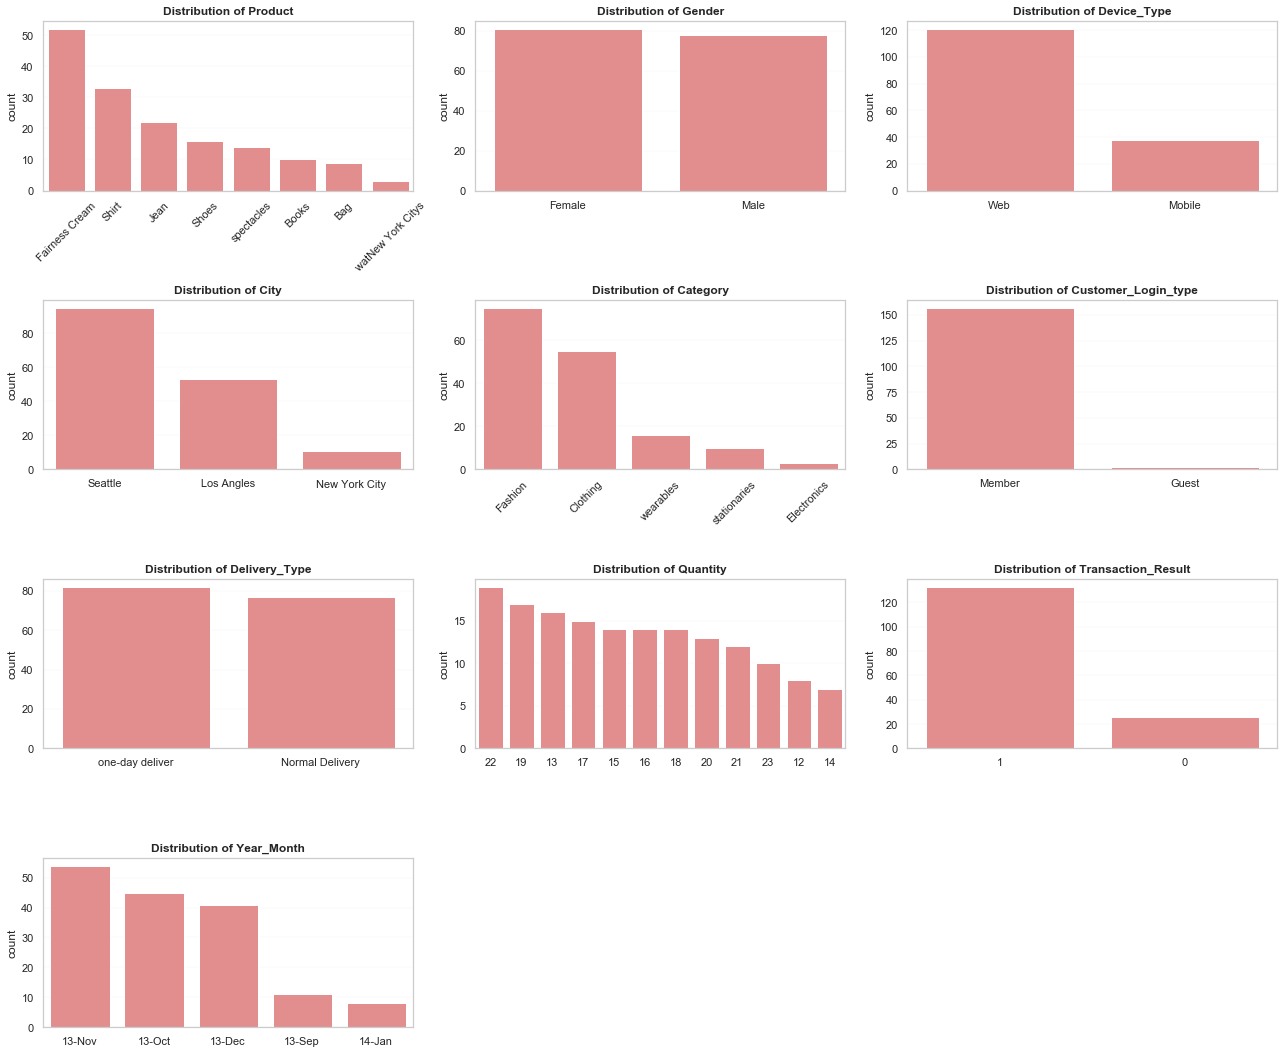

In [71]:
visualize_data(wrong_data_df, checklist, 'lightcoral')

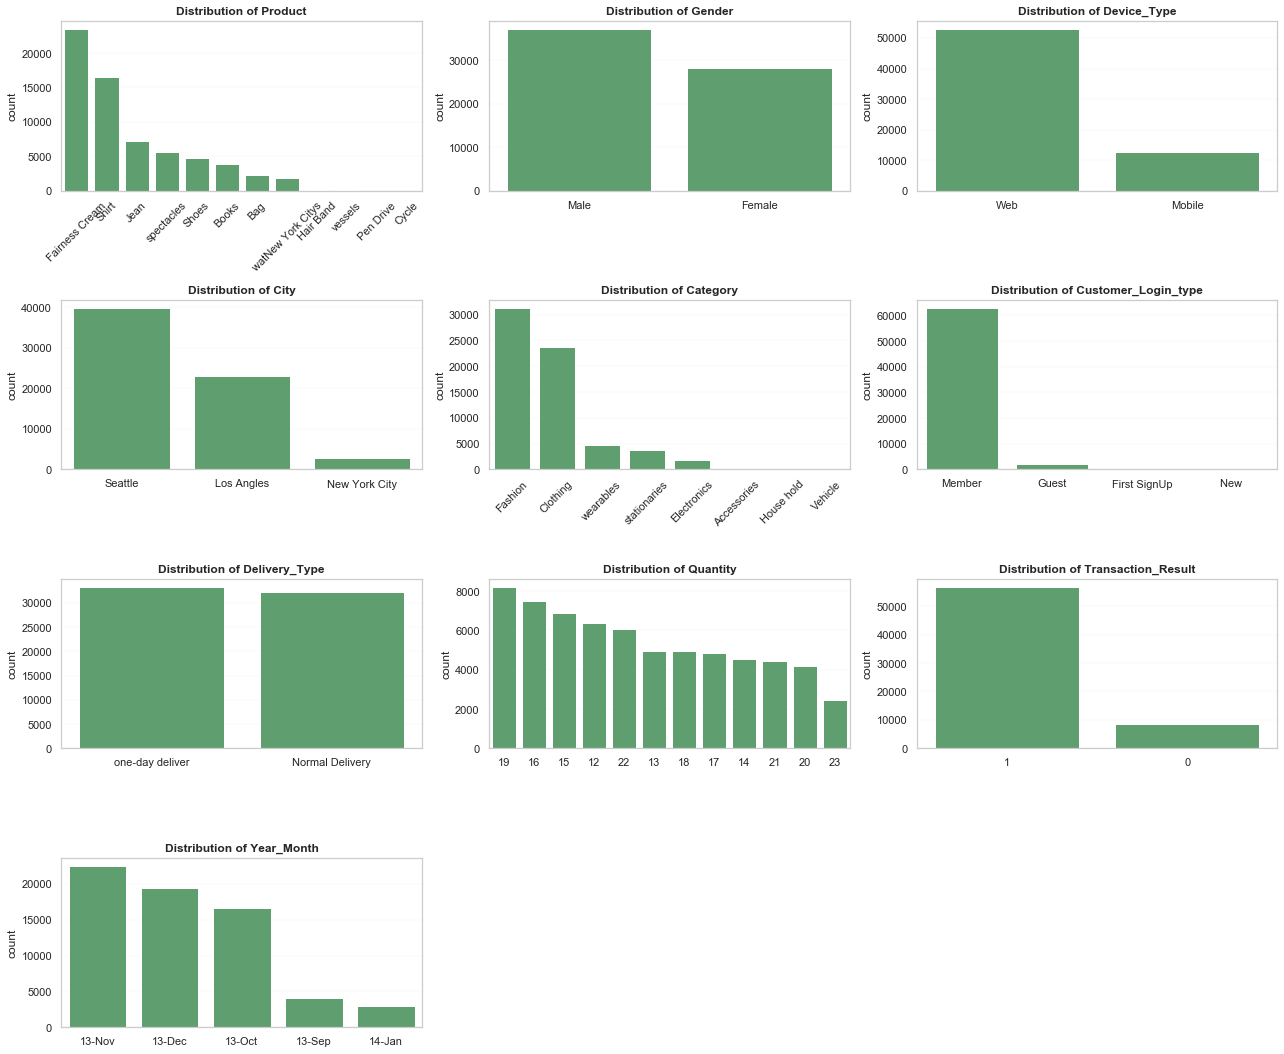

In [72]:
visualize_data(us_df, checklist, 'g')

<a id='cleanup'></a>
## 2. CLEAN UP DATA

In [106]:
### Remove invalid row
us_clean_df = us_df[us_df['Individual_Price_US'] != "#VALUE!"]
us_clean_df.shape

(65376, 19)

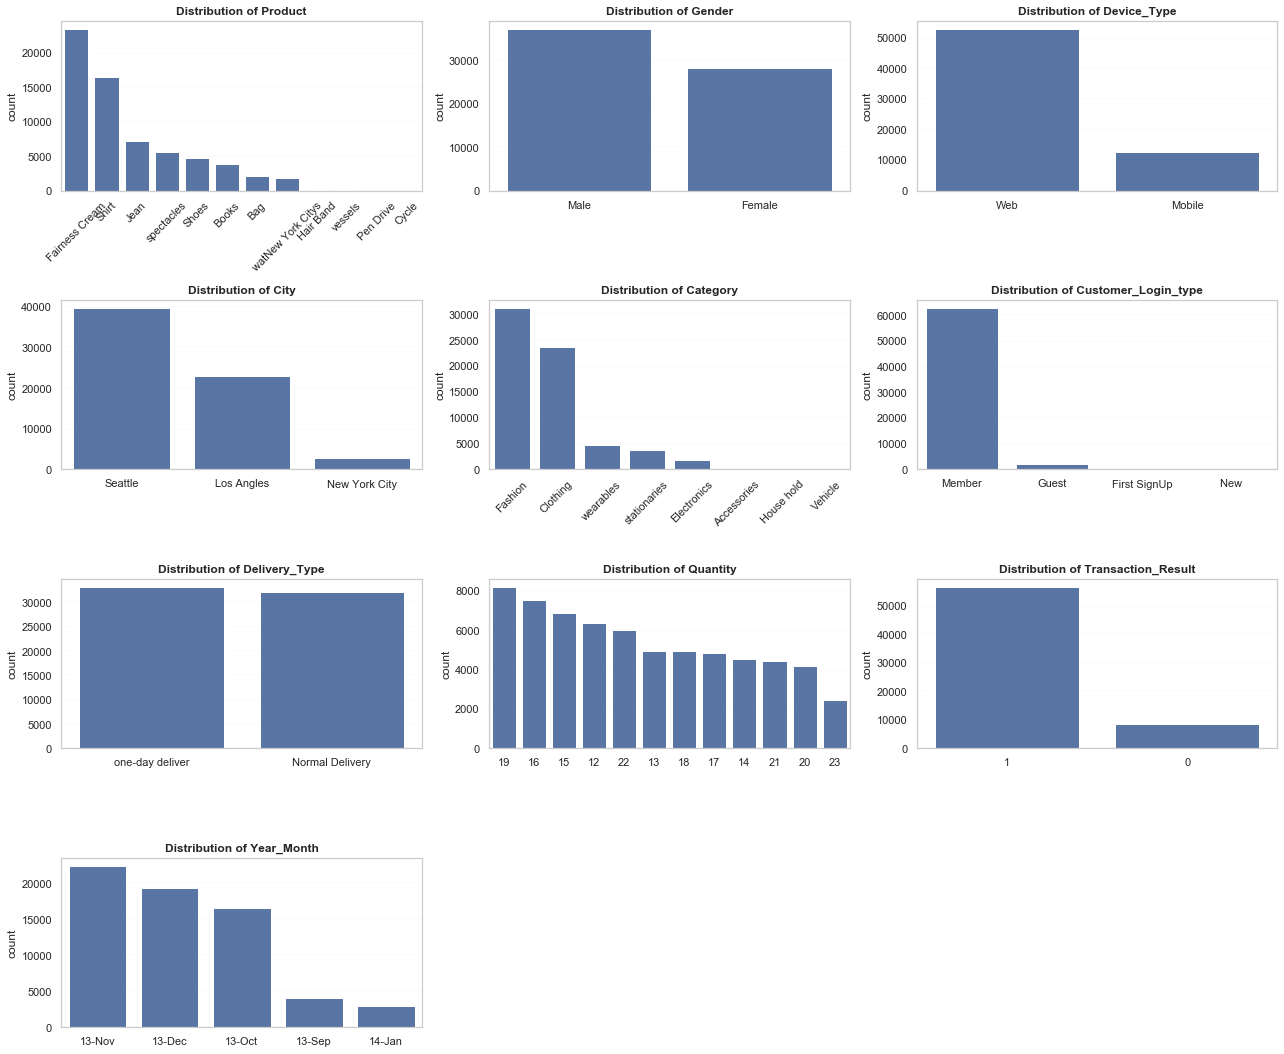

In [107]:
visualize_data(us_clean_df, checklist, 'b')

#### Clean up for "beautiful" value names 
- Consistency: spectacles' => 'Spectacles', 'vessels' => 'Vessels', 'one-day deliver' => 'One-day deliver'

In [108]:
clean_list = ['Product','Delivery_Type']
for x in clean_list:
    print(x, us_clean_df[x].unique())

Product ['Hair Band' 'Jean' 'Shirt' 'watNew York Citys' 'Pen Drive' 'spectacles'
 'Fairness Cream' 'Bag' 'vessels' 'Books' 'Cycle' 'Shoes']
Delivery_Type ['one-day deliver' 'Normal Delivery']


In [109]:
### Replace not capital value to capitals
us_clean_df['Product'] = us_clean_df['Product'].replace('spectacles', 'Spectacles')
us_clean_df['Product'] = us_clean_df['Product'].replace('vessels', 'Vessels')
us_clean_df['Delivery_Type'] = us_clean_df['Delivery_Type'].replace('one-day deliver', 'One-day deliver')

for x in clean_list:
    print(x, us_clean_df[x].unique())

Product ['Hair Band' 'Jean' 'Shirt' 'watNew York Citys' 'Pen Drive' 'Spectacles'
 'Fairness Cream' 'Bag' 'Vessels' 'Books' 'Cycle' 'Shoes']
Delivery_Type ['One-day deliver' 'Normal Delivery']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

#### Adding Time:

- Convert "Date" column to the standard DateTime
- Add the Weekday column
- Clean the "Time" column to contain only the time 0 => 24

In [110]:
# Convert "Date" column to the standard DateTime
us_clean_df['Date'] = pd.to_datetime(us_clean_df['Date'], dayfirst = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
us_clean_df.Date

0       2013-11-14
1       2013-11-05
2       2013-10-01
3       2013-10-04
4       2013-10-12
           ...    
65530   2013-12-13
65531   2013-12-13
65532   2013-12-13
65533   2013-12-13
65534   2013-12-13
Name: Date, Length: 65376, dtype: datetime64[ns]

In [112]:
# Add the Weekday column
us_clean_df['Weekday'] = us_clean_df['Date'].dt.weekday

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
us_clean_df.head()

,Transaction_id,Customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Transaction_Start,Transaction_Result,Amount_US,Individual_Price_US,Year_Month,Time,Weekday
0,40170,1348959766,2013-11-14,Hair Band,Female,Web,United States,New York,New York City,Accessories,Member,One-day deliver,12,1,0,"6,910",576,13-Nov,22:35:51,3
1,33374,2213674919,2013-11-05,Hair Band,Female,Web,United States,California,Los Angles,Accessories,Member,One-day deliver,17,1,1,"1,699",100,13-Nov,06:44:41,1
2,14407,1809450308,2013-10-01,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,0,"4,998",217,13-Oct,00:41:24,1
3,15472,1691227134,2013-10-04,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,0,736,32,13-Oct,22:04:03,4
4,18709,2290737237,2013-10-12,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,1,"4,389",191,13-Oct,15:00:46,5


In [114]:
# Clean the "Time" column to contain only the time 0 => 24
us_clean_df['Time'] = us_clean_df['Time'].apply(lambda x: int(x.split(':')[0]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
us_clean_df.head()

,Transaction_id,Customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Transaction_Start,Transaction_Result,Amount_US,Individual_Price_US,Year_Month,Time,Weekday
0,40170,1348959766,2013-11-14,Hair Band,Female,Web,United States,New York,New York City,Accessories,Member,One-day deliver,12,1,0,"6,910",576,13-Nov,22,3
1,33374,2213674919,2013-11-05,Hair Band,Female,Web,United States,California,Los Angles,Accessories,Member,One-day deliver,17,1,1,"1,699",100,13-Nov,6,1
2,14407,1809450308,2013-10-01,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,0,"4,998",217,13-Oct,0,1
3,15472,1691227134,2013-10-04,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,0,736,32,13-Oct,22,4
4,18709,2290737237,2013-10-12,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,1,"4,389",191,13-Oct,15,5


In [119]:
us_clean_df.Time.value_counts()

8     2796
21    2789
22    2782
14    2779
9     2777
23    2765
20    2757
0     2757
12    2740
7     2726
19    2721
1     2710
4     2707
5     2706
10    2705
16    2704
3     2700
2     2700
17    2697
13    2690
18    2686
11    2680
6     2679
15    2623
Name: Time, dtype: int64

In [120]:
us_clean_df.Weekday.value_counts() # where 0 is Sunday and 6 is Saturday.

4    10288
0    10237
3     9717
1     9699
2     9532
5     7956
6     7947
Name: Weekday, dtype: int64

### SAVE THE DATA TO FOR BUILDING DASHBOARD AND ANALYSIS ON AWS QUICKSIGHT

In [121]:
us_clean_df.to_csv('Us_Ecommerce_Clean_Dataset.csv', index = False)

In [122]:
### Varify the saved data
df = pd.read_csv('Us_Ecommerce_Clean_Dataset.csv')
print(df.shape)
df.head(3)

(65376, 20)


,Transaction_id,Customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Transaction_Start,Transaction_Result,Amount_US,Individual_Price_US,Year_Month,Time,Weekday
0,40170,1348959766,2013-11-14,Hair Band,Female,Web,United States,New York,New York City,Accessories,Member,One-day deliver,12,1,0,"6,910",576,13-Nov,22,3
1,33374,2213674919,2013-11-05,Hair Band,Female,Web,United States,California,Los Angles,Accessories,Member,One-day deliver,17,1,1,"1,699",100,13-Nov,6,1
2,14407,1809450308,2013-10-01,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,0,"4,998",217,13-Oct,0,1


<a id='miscellaneous'></a>
## 3. SOME MISCELLANEOUS ANALYSIS TO USE IN THE REPORT

In [124]:
df.Date.min()

'2013-09-20'

In [125]:
df.Date.max()

'2014-01-13'

In [126]:
df.Customer_id.nunique()

64844

In [129]:
df.query('Product == "Pen Drive"')

,Transaction_id,Customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Transaction_Start,Transaction_Result,Amount_US,Individual_Price_US,Year_Month,Time,Weekday
24896,10062,1796063468,2013-09-20,Pen Drive,Female,Mobile,United States,Washington,Seattle,Electronics,Member,Normal Delivery,18,1,1,"4,298",239,13-Sep,6,4
25185,27295,2260440970,2013-10-27,Pen Drive,Female,Mobile,United States,Washington,Seattle,Electronics,Member,One-day deliver,12,1,0,"2,699",225,13-Oct,4,6
25201,29548,1957166613,2013-10-30,Pen Drive,Female,Mobile,United States,Washington,Seattle,Electronics,Member,Normal Delivery,23,1,1,"7,596",330,13-Oct,10,2
25215,32068,1345869576,2013-11-04,Pen Drive,Female,Mobile,United States,Washington,Seattle,Electronics,Member,Normal Delivery,23,1,1,0,0,13-Nov,8,0
25254,39089,1665867141,2013-11-13,Pen Drive,Female,Mobile,United States,Washington,Seattle,Electronics,Member,Normal Delivery,20,1,1,"6,700",335,13-Nov,16,2
25300,46118,2184733446,2013-11-22,Pen Drive,Female,Mobile,United States,Washington,Seattle,Electronics,Member,One-day deliver,20,1,1,0,0,13-Nov,21,4
25322,49143,1896062594,2013-11-27,Pen Drive,Female,Mobile,United States,Washington,Seattle,Electronics,Member,Normal Delivery,20,1,1,499,25,13-Nov,13,2
25415,58259,2230200900,2013-12-05,Pen Drive,Female,Mobile,United States,Washington,Seattle,Electronics,Member,One-day deliver,23,1,1,0,0,13-Dec,14,3
25543,66210,2219819987,2013-12-13,Pen Drive,Female,Mobile,United States,Washington,Seattle,Electronics,Member,One-day deliver,20,1,1,399,20,13-Dec,22,4
25555,66942,2298221990,2013-12-13,Pen Drive,Female,Mobile,United States,Washington,Seattle,Electronics,Member,One-day deliver,12,1,0,300,25,13-Dec,20,4


In [140]:
len(df.Transaction_id.value_counts().values)

65376

In [141]:
df.Customer_id.value_counts()

1661266404    47
2183969878    44
2009627249    22
2234965006    13
2107762211     5
              ..
1176298825     1
1283629690     1
1461374284     1
1389806925     1
2155481087     1
Name: Customer_id, Length: 64844, dtype: int64

In [144]:
min(df.query("City == 'Seattle'").Date.values)

'2013-09-20'

In [145]:
max(df.query("City == 'Seattle'").Date.values)

'2013-12-13'

In [156]:
df.Transaction_Start.value_counts()

1    65376
Name: Transaction_Start, dtype: int64

In [157]:
df.Transaction_Result.value_counts()

1    56709
0     8667
Name: Transaction_Result, dtype: int64